In [ ]:
Team:
Tejas Morbagal Harish
Saba Khan

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import random as rand
import numpy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         shuffle=False, num_workers=2)

0it [00:00, ?it/s]

170500096it [00:04, 39947296.67it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
'''
STEP 2: MAKING DATASET ITERABLE
'''
 
batch_size = 100
n_iters = 20000
num_epochs = n_iters / (len(trainset) / batch_size)
num_epochs = int(num_epochs)
 
train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
 

In [0]:
import torch.nn as nn

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu = nn.ReLU()
        # Output layer
        self.fc2 = nn.Linear(hidden_dim, 10)
      
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu(out)
        # Final result from output layer 
        out = self.fc2(out)
        return out
 

In [0]:
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 32*32*3
hidden_dim = 1500
output_dim = 10
 
model = LogisticRegressionModel(input_dim,hidden_dim, output_dim)

In [8]:
if torch.cuda.is_available():
    avDev = torch.device("cuda")
else:
    avDev = torch.device("cpu")

print(avDev)

cuda


In [0]:
#  USE GPU FOR MODEL  #
#######################
 
model.to(avDev)
 
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss().to(avDev)

 
'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1
 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [10]:
num_epochs

40

Epoch: 1  Loss: 1.6551757020950317
Epoch: 2  Loss: 1.443579820871353
Epoch: 3  Loss: 1.3440661718845368
Epoch: 4  Loss: 1.2748922204971314
Epoch: 5  Loss: 1.207192219376564
Epoch: 6  Loss: 1.1545100953578948
Epoch: 7  Loss: 1.1040457644462585
Epoch: 8  Loss: 1.054586448073387
Epoch: 9  Loss: 1.0053653477430344
Epoch: 10  Loss: 0.9703201674222947
Epoch: 11  Loss: 0.92210613322258
Epoch: 12  Loss: 0.8856478037834168
Epoch: 13  Loss: 0.8483276413679123
Epoch: 14  Loss: 0.8128540782332421
Epoch: 15  Loss: 0.7649186872839928
Epoch: 16  Loss: 0.7512387313246727
Epoch: 17  Loss: 0.6930660780668259
Epoch: 18  Loss: 0.675840265750885
Epoch: 19  Loss: 0.6377140455245972
Epoch: 20  Loss: 0.61055330234766
Epoch: 21  Loss: 0.5909820711612701
Epoch: 22  Loss: 0.5485757195353508
Epoch: 23  Loss: 0.5046373028755188
Epoch: 24  Loss: 0.5232479022741318
Epoch: 25  Loss: 0.4769185253083706
Epoch: 26  Loss: 0.4553188540041447
Epoch: 27  Loss: 0.4612427116930485
Epoch: 28  Loss: 0.3825755678117275
Epoch: 29

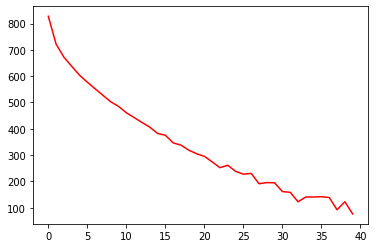

In [11]:
# Training the model on trainset

iter = 0
pred_test_results = []
labels_test_results = []
loss_values = []
num_updates = 0
#correct = 0.0
for epoch in range(num_epochs):
    running_loss = 0.0
    batch_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        
      
        images = Variable(images.view(-1, 32*32*3)).to(avDev)
        labels = Variable(labels).to(avDev)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        batch_loss += loss.item()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
    print("Epoch:", epoch+1, " Loss:", batch_loss/len(train_loader))
    loss_values.append(batch_loss)

print("training ended")  
plt.plot(loss_values, 'r')
plt.show()     


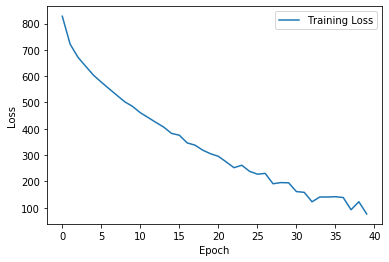

In [12]:
#plot the learning curve
plt.plot(range(len(loss_values)),loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() 


In [15]:
# Testing the model on testset

correct = 0
total = 0
num_updates = 0
# Iterate through test dataset
for images, labels in test_loader:
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    images = Variable(images.view(-1, 32*32*3)).to(avDev)
    # Forward pass only to get logits/output
    outputs = model(images)
                
    # Get predictions from the maximum value
                
    _, predicted = torch.max(outputs.data, 1)
    predicted1 = predicted
    pred_list = predicted1.tolist()
    pred_test_results.extend(pred_list)
    
    labels1 = labels
    labels_list = labels1.tolist()
    labels_test_results.extend(labels_list)
            
    correct += (predicted.cpu() == labels.cpu()).sum().float()
    # Total number of labels
    total += labels.size(0)
                
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    
    num_updates +=1 

pred_test_numpy = np.asarray(pred_test_results)

labels_test_numpy = np.asarray(labels_test_results)
accuracy = 100 * (correct / total)
print("Accuracy on total test data: {}%".format(accuracy.item()))
             

Accuracy on total test data: 54.93000030517578%


In [16]:
# Confusion Matrix
print("Confusion Matrix")
confusion_matrix(pred_test_numpy, labels_test_numpy)

Confusion Matrix


array([[1278,  110,  150,   66,   74,   36,   38,   72,  198,  112],
       [  48, 1330,   32,   44,   20,   20,   44,   34,  138,  356],
       [ 144,   42,  970,  234,  306,  204,  212,  130,   56,   38],
       [  32,   26,  116,  622,  106,  312,  136,  100,   62,   60],
       [  46,   28,  262,  154,  954,  136,  158,  138,   40,   26],
       [  20,   34,  154,  422,  134,  948,  104,  186,   44,   48],
       [  42,   36,  124,  212,  162,  102, 1198,   44,    8,   30],
       [  30,   44,  120,  134,  164,  178,   42, 1212,   24,   92],
       [ 266,  104,   40,   44,   48,   30,   32,   14, 1354,  118],
       [  94,  246,   32,   68,   32,   34,   36,   70,   76, 1120]])

In [17]:
#Best hyperparameters
print("Learning rate:", learning_rate)
print("Number of epochs", num_epochs)

Learning rate: 0.1
Number of epochs 40
